# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from importlib import reload
plt=reload(plt)

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

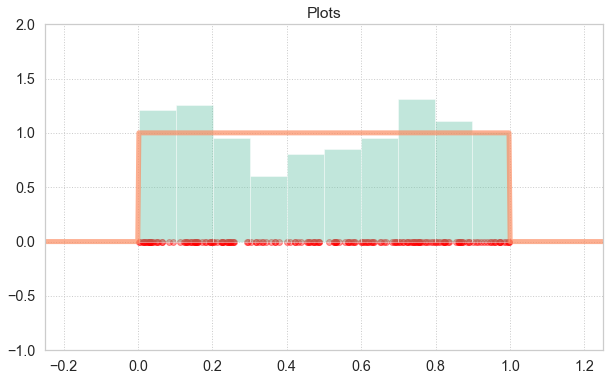

Figure(432x288)
Figure(1080x720)


<Figure size 432x288 with 0 Axes>

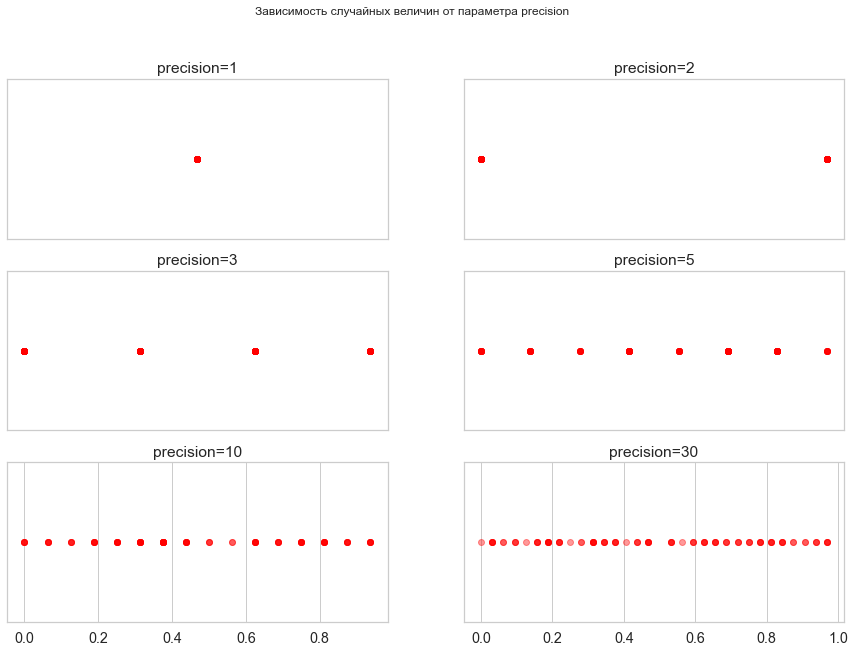

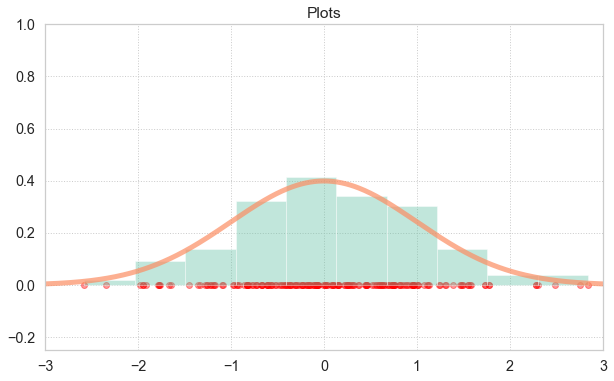

Figure(432x288)


<Figure size 432x288 with 0 Axes>

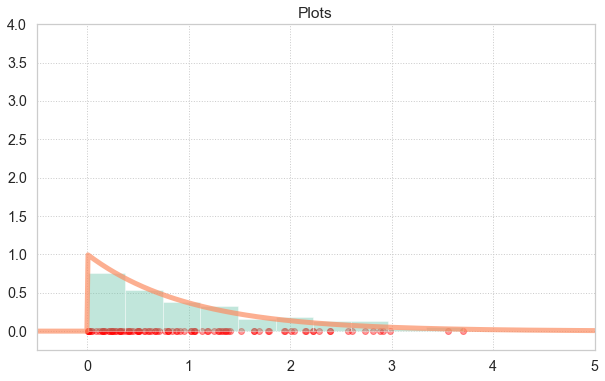

Figure(432x288)


<Figure size 432x288 with 0 Axes>

In [40]:
coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

def uniform(size=1, precision=30):
    shape = (size,) if isinstance(size, int) else size
    bits = coin(size=(precision,) + shape)
    powers = 2 ** np.arange(1, precision + 1)[::-1].reshape((precision,) + (1,) * len(shape))
    return np.sum(bits * powers, axis=0) / (2 ** (precision + 1))


def plot_uniform_density(size=200):
    plt.figure(figsize=(10, 6))
    plt.title("Plots")
    x = uniform(size)
    y = np.empty(size)
    y.fill(0)
    plt.hist(x, 10, density=True, alpha=0.4)
    plt.scatter(x, y, c ="red", alpha=0.4)
    grid = np.linspace(-0.25, 1.25, 500)
    plt.plot(grid, uniform_pdf(grid), lw=5, alpha=0.7)
    plt.grid(ls=":")
    plt.xlim((-0.25, 1.25))
    plt.ylim((-1, 2))
    plt.show()
    return plt.gcf()

def plot_uniform_different_precision(size=100):
    # определите график размера 15 на 3
    plt.figure(figsize=(15, 10))
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.suptitle("Зависимость случайных величин от параметра precision")
        plt.subplot(3, 2, i + 1)
        x = uniform(size, i)
        plt.title(f"precision={precision}")
        plt.scatter(x, np.zeros(size), alpha=0.4, color='red')
        plt.yticks([])
        if i < 4:
            plt.xticks([])
    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    uni1, uni2 = uniform(size, precision), uniform(size, precision)
    return loc + scale * np.sqrt(-2 * np.log(uni1)) * np.cos(2 * np.pi * uni2)


def plot_normal_density(size=200):
    plt.figure(figsize=(10, 6))
    plt.title("Plots")
    mu, sigma = 0, 1
    x = normal(size, mu, sigma)
    y = np.zeros(size)

    plt.hist(x, 10, density=True, alpha=0.4)
    plt.scatter(x, y, c ="red", alpha=0.4)

    grid = np.linspace(-3, 3, 500)
    plt.plot(grid, norm_pdf(grid, mu, sigma), lw=5, alpha=0.7)
    plt.grid(ls=":")
    plt.xlim((-3, 3))
    plt.ylim((-0.25, 1))
    plt.show()
    return plt.gcf()

def expon(size=1, lambd=1, precision=30):
    return -1/lambd * np.log(uniform(size, precision))

def plot_expon_density(size=100):
    plt.figure(figsize=(10, 6))
    plt.title("Plots")
    x = expon(size)
    y = np.zeros(size)

    plt.hist(x, 10, density=True, alpha=0.4)
    plt.scatter(x, y, c ="red", alpha=0.4)

    grid = np.linspace(-0.5, 5, 500)
    plt.plot(grid, expon_pdf(grid), lw=5, alpha=0.7)
    plt.grid(ls=":")
    plt.xlim((-0.5, 5))
    plt.ylim((-0.25, 4))

    plt.show()
    return plt.gcf()

print(plot_uniform_density())
print(plot_uniform_different_precision())
print(plot_normal_density())
print(plot_expon_density())

**Выводы:**
Из результатов видно, что генерировать случайные величины с помощью нормального и экспоненциального распределения можно имея лишь равномерное.
А равномерное распределение можно в свою очередь получить с помощью двоичного кодирования n величин бернулевским распределением с вероятностью 1/2. При том, судя по результатам, чем больше n, тем точнее будут генерироваться числа.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

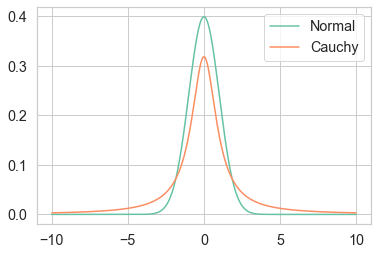

In [41]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, sps.norm.pdf(x), label='Normal')
plt.plot(x, sps.cauchy.pdf(x), label='Cauchy')
plt.legend()
plt.show()

Мы видим, что плотность распределения Коши имеет тяжелые хвосты, а плотность нормального распределения стремительно убывает в хвостах. Также заметим, что плотность распределения Коши не имеет конечного математического ожидания в отличие от нормального.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон?

Повторим эксперимент из лекции только для распределения Коши, возьмем size случайных величин и count выборок
Начертим графики для выборок на 1 figure и посмотрим на среднее значение случайной величины для определенного их количества.

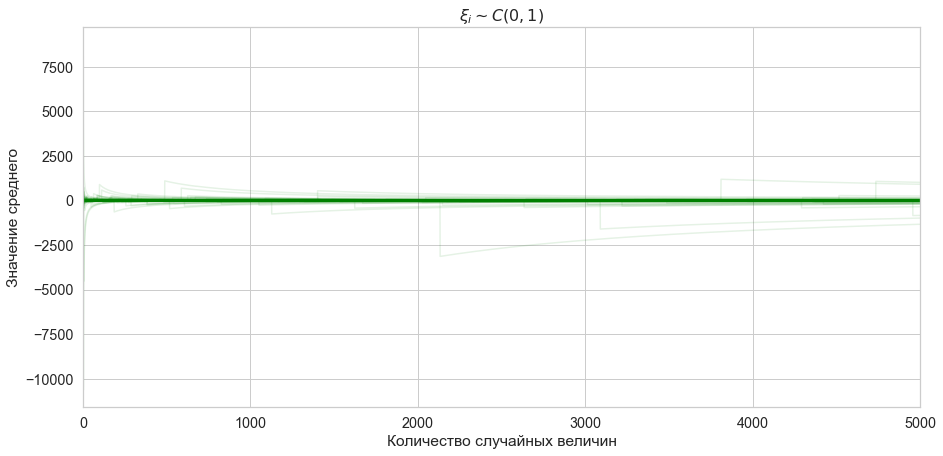

In [42]:
count = 2000
size = 5000
label = "$\\xi_i \\sim C(0,1)$"
samples = sps.cauchy.rvs(size=(count, size))
means = samples.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(15, 7))
for i in range(count):
    plt.plot(np.arange(size) + 1, means[i], color='green', alpha=0.1)

plt.title(label, fontsize=16)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));
plt.show()

**Вывод:** При достаточно большом количестве случайных величин значение среднего достаточно отклоняется от остальных значений (НЕТ МАТОЖА НЕ СТОИТ ЗАБЫВАТЬ), при увеличении размера выборки выборочные средние не будут сходиться к какому-то определенному значению. Значит ЗБЧ не выполняется.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

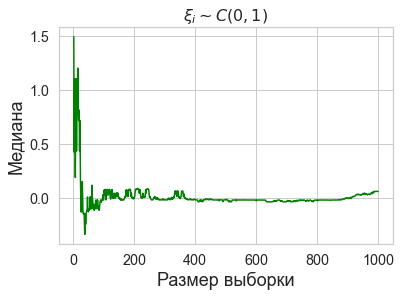

In [46]:
plt=reload(plt)
size = 1000

# генерируем выборку из распределения Коши
sample = sps.cauchy.rvs(size=size)

# массив медиан
medians = np.zeros(1000)

for i in range(size):
    medians[i] = np.median(sample[:i+1])
plt.plot(np.arange(size) + 1, medians, color='green')

plt.title(label, fontsize=16)
plt.xlabel("Размер выборки", fontsize=18)
plt.ylabel("Медиана", fontsize=18)
plt.show()

**Вывод:** Из полученного графика видим, что выборочная медиана для распределения Коши сильно колеблется при увеличении выборки. Это связано с тяжелыми хвостами. При увеличении размера выборки вероятность попадания в эти хвосты также увеличивается. В результате выборочная медиана может принимать большие значения и сильно колебаться.

...

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

C:\Users\DALERH~1\AppData\Local\Temp/ipykernel_13468/1159067573.py:30: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((0, size))


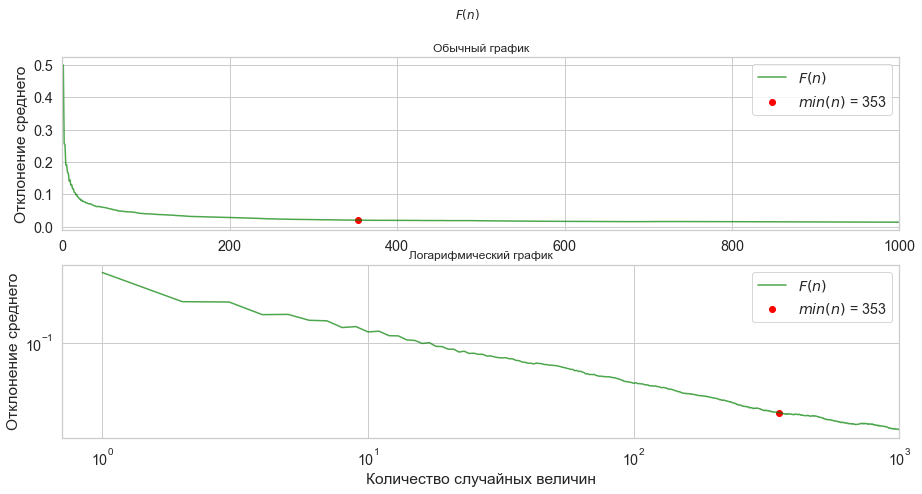

In [57]:
count = 500
size = 1000
label = "$F(n)$"
samples = sps.bernoulli(0.5).rvs(size=(count, size))
means = samples.cumsum(axis=1) / (np.arange(size) + 1)
average = np.mean(np.abs(means - 0.5), axis=0)
border_data = np.where(average <= 0.02)[0][0]

plt.figure(figsize=(15, 7))

plt.suptitle(label)

plt.subplot(2, 1, 1)
plt.plot(np.arange(size) + 1, average, color='green', alpha=0.7, label='$F(n)$')
plt.scatter(border_data, average[border_data], color='red', label=f"$min(n)$ = {border_data}")
plt.title("Обычный график", fontsize=12)
plt.ylabel('Отклонение среднего')
plt.legend()
plt.xlim((0, size))

plt.subplot(2, 1, 2)
plt.plot(np.arange(size) + 1, average, color='green', alpha=0.7, label='$F(n)$')
plt.scatter(border_data, average[border_data], color='red', label=f"$min(n)$ = {border_data}")
plt.title("Логарифмический график", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Количество случайных величин')
plt.ylabel('Отклонение среднего')
plt.legend()
plt.xlim((0, size))



plt.show()

**Вывод:** N n принимает значение от 350 до 400

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

C:\Users\DALERH~1\AppData\Local\Temp/ipykernel_13468/2196561582.py:6: RuntimeWarning: divide by zero encountered in true_divide
  means = samples.cumsum(axis=1) / (np.arange(size))
C:\Users\DALERH~1\AppData\Local\Temp/ipykernel_13468/2196561582.py:6: RuntimeWarning: invalid value encountered in true_divide
  means = samples.cumsum(axis=1) / (np.arange(size))


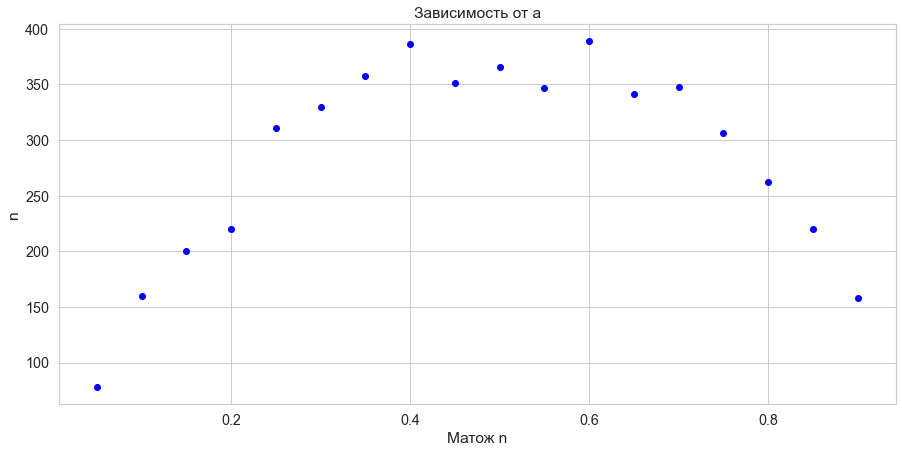

In [60]:
grid = np.arange(0.05, 0.95, 0.05)

data = list()
for a in grid:
    samples = sps.bernoulli(a).rvs(size=(count, size))
    means = samples.cumsum(axis=1) / (np.arange(size))
    average = np.mean(np.abs(means - a), axis=0)
    border_data = np.where(average <= 0.02)[0][0]
    data.append(border_data)

plt.figure(figsize=(15, 7))
plt.scatter(grid, data, color="blue")
plt.title("Зависимость от a")
plt.xlabel("Матож n")
plt.ylabel("n")
plt.show()

**Выводы:**

...